<a href="https://colab.research.google.com/github/hsandaver/hsandaver.github.io/blob/main/236089371.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Condition report with reflectance, abosorbance and CIELAB Tristimulus Values

[OCLC No. 236089371](https://divinity.on.worldcat.org/oclc/236089371)

Conybeare, William John and J. S Howson. *The Life and Epistles of St. Paul.* [A] New edition [of the Library edition]. London: Longmans, Green, 1872.

# Reflectance and Absorbance Spectra

In [ ]:
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()

# prepare some data
x1 = [460]
x2 = [550]
x3 = [640]
y1 = [0.05]
y2 = [0.04]
y3 = [0.10]

# create a new plot with a title and axis labels
p = figure(title="Reflectance spectra for  Directory for masses with children (Binding) 2022-06-27", 
           x_axis_label="WAVELENGTH, nm", y_axis_label="% REFLECTANCE", width=800, height=600) 

# add multiple renderers
p.diamond(x=x1, y=y1, size=15, color="Blue", line_width=2)
p.diamond(x=x2, y=y2, size=15, color="Green", line_width=2)
p.diamond(x=x3, y=y3, size=15, color="Red", line_width=2)

# show the results
show(p)

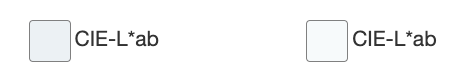

In [ ]:
## Calculate the euclidean distance between CIELab values of Title page and Verso.

## A result less than two is considered perceptually equivalent. 
## Since the title page is the most exposed page usually in book, this test is a 
## quick and dirty test to see if greater aging occured on the title page [recto] compared to the 
## verso of the same page.

import math

L1 = 94.96
a1 = -0.68
b1 = -1.97

L2 = 98.10
a2 = -0.71
b2 = -0.83

DeltaE = math.sqrt((L2-L1) ** 2 + (a2-a1) ** 2 + (b2-b1) ** 2)

DeltaE

In [ ]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import dodge

output_file("dodged_bars.html")

fruits = ['Recto', 'Verso']
years = ['L', 'a', 'b']

data = {'fruits' : fruits,
        'L'   : [94.96, 98.10],
        'a'   : [-0.68, -0.71],
        'b'   : [-1.97, -0.83]}

source = ColumnDataSource(data=data)

p = figure(x_range=fruits, y_range=(-10, 127), height=600, title="CIE LAB Tristimulus Values for Title page",
           toolbar_location=None, tools="")

p.vbar(x=dodge('fruits', -0.25, range=p.x_range), top='L', width=0.2, source=source,
       color="#c9d9d3", legend_label="L")

p.vbar(x=dodge('fruits',  0.0,  range=p.x_range), top='a', width=0.2, source=source,
       color="#718dbf", legend_label="a")

p.vbar(x=dodge('fruits',  0.25, range=p.x_range), top='b', width=0.2, source=source,
       color="#e84d60", legend_label="b")

p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)